##### Lending Club Data Project

# 3 Modelling

__Content__ <br>
3.1 Data Import <br>
3.2 Train-Test-Split for Training Data <br>
3.3 SMOTE <br>
3.4 Baseline Model: Dummy Classifier <br>
3.5 Feature Selection <br>
3.6 Logistic Regression (5 Features)<br>
3.7 Logistic Regression (10 Features)<br>
3.8 KNN (5 Features)<br>
3.9 KNN (10 Features)<br>
3.10 Ensemble: AdaBoost <br>
3.11 Ensemble: Stacking <br>
3.12 Decision Tree (5 Features) <br>
3.13 Decision Tree (10 Features) <br>
3.14 Random Forest (5 Features) <br>
3.15 Random Forest (10 Features) <br>
3.16 Ensemble: Adaboost II (10 Features)

Note that the code was run several times when the models of both partners were combined. Since we used randomized search which leads to slightly different results every time, the best models shown in the output and the best models used in the prediction inconclusively match.

### 3.1 Import training data

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
import re 
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif
pd.set_option('display.max_columns', None)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix, fbeta_score

In [3]:
X_train = pd.read_csv('train_data_rescaled.csv')
y_train = pd.read_csv('y_train.csv')
X_train.head()

,Unnamed: 0,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,term,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_unknown,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_IL,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,-0.403061,-0.367347,-0.891304,-0.361449,-0.5,-0.7899,0.0,-0.400000,0.0,-1.0,-1.000000,0.0,-0.546581,-0.123932,-0.733333,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-0.709184,-0.673469,0.894928,-0.663813,1.5,-1.1799,0.0,-0.436538,0.0,0.0,-1.000000,0.0,-0.478905,1.057692,-1.066667,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-0.158163,-0.122449,-1.050725,-0.089012,-0.5,-0.1999,0.0,-0.566346,0.0,-1.0,0.000000,0.0,-0.121236,-0.732906,-0.266667,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,0.005102,0.040816,-0.782609,0.124841,-0.5,-0.6498,-1.0,-1.291346,0.0,-1.0,-0.166667,0.0,-0.672444,-1.051282,-0.466667,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,-0.505102,-0.469388,0.456522,-0.412665,0.5,-1.0299,-1.0,-0.535577,0.0,0.0,-0.833333,0.0,-0.393115,0.950855,-0.666667,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train.drop(['Unnamed: 0'], inplace = True, axis = 1)
y_train.drop('Unnamed: 0', inplace = True, axis = 1)

### 3.2 Train-Test-Split for Training Data

Since we have a large data set, the train data is split once again to have an evaluation dataset for the training data.

In [5]:
from sklearn.model_selection import train_test_split
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_train, y_train, test_size = .2, random_state = 42, stratify = y_train)

### 3.3 SMOTE 

The data is very imbalanced so we use the SMOTE (Synthetic Minority Oversampling Technique) method to address this issue. SMOTE synthesizes new datasets from the existing examples, oversampling the minority class (0 = charged off). 

In [6]:
!pip install imbalanced-learn

In [7]:
import imblearn


In [8]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(ye_train.loan_status==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ye_train.loan_status==0)))

sm = SMOTE(random_state=2)
X_smo, y_smo = sm.fit_sample(Xe_train, ye_train.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_smo.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smo.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smo==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smo==0)))

Before OverSampling, counts of label '1': 16227
Before OverSampling, counts of label '0': 2698 

After OverSampling, the shape of train_X: (32454, 90)
After OverSampling, the shape of train_y: (32454,) 

After OverSampling, counts of label '1': 16227
After OverSampling, counts of label '0': 16227


### 3.4 Baseline Model: Dummy Classifier

The dummy classifier uses simple classification rules and is therefore useful as a simple baseline to compare with other (real) classifiers. It is not used for 'real' modelling. Since it is a baseline model, the original data wihtout SMOTE are used.

              precision    recall  f1-score   support

         0.0       0.14      0.14      0.14       675
         1.0       0.86      0.86      0.86      4057

    accuracy                           0.76      4732
   macro avg       0.50      0.50      0.50      4732
weighted avg       0.76      0.76      0.76      4732

F beta Score for both classes:
0.76


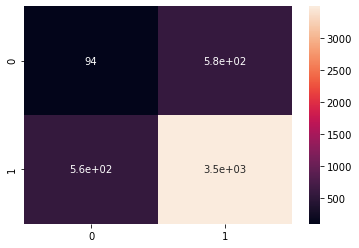

In [9]:
from sklearn.dummy import DummyClassifier
#Define the Classifier and fit it to the train data
dummy_clf = DummyClassifier(random_state = 2, strategy = 'stratified')
dummy_clf.fit(Xe_train, ye_train)
cv_results = cross_validate(dummy_clf, Xe_train, ye_train, cv=5, return_estimator = True)


#Make predictions using cross-validation
ye_pred = cross_val_predict(dummy_clf, Xe_test, ye_test, cv = 5)

# Printing evaluation scores for the Dummy Classifier 
print(classification_report(ye_test, ye_pred))
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .2, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred), annot=True);

Since the data is imbalanced, it does not make sense to interpret accuracy but to focus recall and precision (or the f1 score). Here one can see that the model is good at predicting whether a person will pay back. But, since this class is underrepresented, the model fails to predict incomplete paybacks which is bad since for an investor for he will lose his money. This results in a bad overall model performance.

### 3.5 Feature Selection

We select the best 5 resp. 10 features by using the SelectKBest tool.

In [10]:
# Create and fit selector
best_features = SelectKBest(mutual_info_classif, k=5)
X_smo_5 = best_features.fit_transform(X_smo, np.array(y_smo).ravel())
# Get columns to keep and create new dataframe with those only
cols = best_features.get_support(indices=True)
X_smo_5 = X_smo.iloc[:,cols]
X_smo_5 = pd.DataFrame(X_smo_5)

In [11]:
X_smo_5.head()

,loan_amnt,int_rate,open_acc,revol_util,total_acc
0,-0.607143,-0.213768,0.833333,0.688034,0.466667
1,1.025510,-0.891304,0.500000,-0.241453,0.666667
2,-0.709184,-0.125000,-1.000000,0.108974,-0.533333
3,-0.198980,-0.262681,-0.333333,0.230769,-0.600000
4,0.387755,-1.094203,1.000000,-0.914530,1.066667


In [12]:
# Create and fit selector
best_features = SelectKBest(mutual_info_classif, k=12)
X_smo_10 = best_features.fit_transform(X_smo, np.array(y_smo).ravel())
# Get columns to keep and create new dataframe with those only
cols = best_features.get_support(indices=True)
X_smo_10 = X_smo.iloc[:,cols]
X_smo_10 = pd.DataFrame(X_smo_10)

In [13]:
X_smo_10.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_util,total_acc
0,-0.607143,-0.571429,-0.213768,-0.572486,0.0,0.8001,0.0,-0.371154,-1.0,0.833333,0.688034,0.466667
1,1.025510,1.061224,-0.891304,0.449072,-0.5,-0.2999,-1.0,-1.131731,0.0,0.500000,-0.241453,0.666667
2,-0.709184,-0.673469,-0.125000,-0.695438,0.0,-0.7749,-2.0,0.119231,-1.0,-1.000000,0.108974,-0.533333
3,-0.198980,-0.163265,-0.262681,-0.073933,0.0,-0.6749,-1.0,0.975000,1.0,-0.333333,0.230769,-0.600000
4,0.387755,0.423469,-1.094203,0.533225,-0.5,1.2501,0.0,0.604808,1.0,1.000000,-0.914530,1.066667


issue_d is dropped because it has no predictive value for the target taking into account that an investor will only know the current year a borrower begs for money.
loan_amnt is dropped because it's redundant to funded_amnt.

In [14]:
X_smo_10.drop(['issue_d', 'loan_amnt'], axis = 1, inplace = True)

In [15]:
X_smo_10.columns

Index(['funded_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc'],
      dtype='object')

In [16]:
#Adapt the test data with the corresponding variables
X_test_5 = Xe_test[['int_rate', 'loan_amnt', 'open_acc', 'revol_util', 'total_acc']]
X_test_10 = Xe_test[['funded_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc']]

In [17]:
X_smo_5.to_csv('X_smo_5.csv')
X_smo_10.to_csv('X_smo_10.csv')
pd.DataFrame(y_smo).to_csv('y_smo.csv')

### 3.6 Logistic Regression Model 5 Features

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_clf = LogisticRegression(penalty = 'elasticnet', solver = 'saga', n_jobs = -1, random_state = 0)

We will use RandomizedSearchCV to identify the best logistic regression model.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': np.arange(0.1,1),
             'max_iter': np.arange(1000, 10000),
             'l1_ratio': np.arange(0, 1), 
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid = RandomizedSearchCV(log_clf, param_grid, cv = 5, verbose = 5)
grid.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1, score=0.545, total=   1.1s
[CV] max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1, score=0.539, total=   0.6s
[CV] max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1 .
[CV]  max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1, score=0.545, total=   0.1s
[CV] max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1 .
[CV]  max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1, score=0.542, total=   0.1s
[CV] max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV]  max_iter=1791, l1_ratio=0, class_weight={0: 0.3, 1: 0.7}, C=0.1, score=0.540, total=   0.1s
[CV] max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.5s
[CV] max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1 
[CV]  max_iter=2522, l1_ratio=0, class_weight={0: 0.95, 1: 0.05}, C=0.1, score=0.500, total=   0.1s
[CV] max_iter=1372, l1_ratio=0, class_weig

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.2s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, penalty='elasticnet',
                                                random_state=0, solver='saga'),
                   param_distributions={'C': array([0.1]),
                                        'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
   

In [21]:
best_log_5 = grid.best_params_
best_log_5

{'max_iter': 3193, 'l1_ratio': 0, 'class_weight': {0: 0.5, 1: 0.5}, 'C': 0.1}

Applying the best model to the data with 5 features:

In [22]:
best_log_5 = LogisticRegression(C=0.1, class_weight= {0: 0.3, 1: 0.7}, l1_ratio=0, max_iter=3193,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log_5.fit(X_smo_5, y_smo)
ye_pred1 = best_log_5.predict(X_test_5)

F beta Score for both classes:
0.77


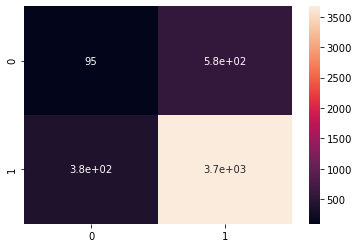

In [23]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred1), annot=True);

### 3.7 Logistic Regression Model 10 Features

In [24]:
from sklearn.model_selection import RandomizedSearchCV
param_grid2 = {'C': np.arange(0.1,1),
             'max_iter': np.arange(1000, 10000),
             'l1_ratio': np.arange(0, 1), 
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid2 = RandomizedSearchCV(log_clf, param_grid2, cv = 5, verbose = 5)
grid2.fit(X_smo_10, y_smo)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.504, total=   0.2s
[CV] max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.504, total=   0.2s
[CV] max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.504, total=   0.2s
[CV] max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .
[CV]  max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.504, total=   0.2s
[CV] max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1 .


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  max_iter=7751, l1_ratio=0, class_weight={0: 0.9, 1: 0.1}, C=0.1, score=0.504, total=   0.2s
[CV] max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1 .
[CV]  max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1, score=0.540, total=   0.2s
[CV] max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1 .
[CV]  max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1, score=0.538, total=   0.2s
[CV] max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1 .
[CV]  max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1, score=0.537, total=   0.2s
[CV] max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1 .
[CV]  max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1, score=0.539, total=   0.2s
[CV] max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1 .
[CV]  max_iter=4575, l1_ratio=0, class_weight={0: 0.8, 1: 0.2}, C=0.1, score=0.539, total=   0.2s
[CV] max_iter=7437, l1_ratio=0, class_weight={0: 0.9, 1: 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.3s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, penalty='elasticnet',
                                                random_state=0, solver='saga'),
                   param_distributions={'C': array([0.1]),
                                        'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
   

In [25]:
best_log_10 = grid2.best_params_
best_log_10

{'max_iter': 7639, 'l1_ratio': 0, 'class_weight': {0: 0.5, 1: 0.5}, 'C': 0.1}

In [26]:
best_log_10 = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, l1_ratio=0, max_iter=7639,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')
best_log_10.fit(X_smo_10, y_smo)
ye_pred2 = best_log_10.predict(X_test_10)

In [27]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred2, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.82


The model with more features is better. Next, we'll try a KNN.

### 3.8 K-Nearest-Neighbours 5 Features

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs = -1)

Again, we use RandomizedSearchCV to find the best model.

In [29]:
param_grid3 = {
             'metric': ['euclidean', 'manhattan', 'minkowski'],
             'weights': ['uniform','distance'],
            'n_neighbors': [5, 10, 50, 100],}

grid3 = RandomizedSearchCV(knn_clf, param_grid3, cv = 5, verbose = 5)
grid3.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.756, total=   0.2s
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.730, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.730, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.727, total=   0.1s
[CV] weights=distance, n_neighbors=10, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=10, metric=euclidean, score=0.733, total=   0.1s
[CV] weights=distance, n_neighbors=100, metric=manhattan .............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  weights=distance, n_neighbors=100, metric=manhattan, score=0.692, total=   0.4s
[CV] weights=distance, n_neighbors=100, metric=manhattan .............
[CV]  weights=distance, n_neighbors=100, metric=manhattan, score=0.704, total=   0.4s
[CV] weights=distance, n_neighbors=100, metric=manhattan .............
[CV]  weights=distance, n_neighbors=100, metric=manhattan, score=0.696, total=   0.5s
[CV] weights=distance, n_neighbors=100, metric=manhattan .............
[CV]  weights=distance, n_neighbors=100, metric=manhattan, score=0.703, total=   0.5s
[CV] weights=distance, n_neighbors=100, metric=manhattan .............
[CV]  weights=distance, n_neighbors=100, metric=manhattan, score=0.713, total=   0.4s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score=0.730, total=   0.3s
[CV] weights=uniform, n_neighbors=5, metric=minkowski ................
[CV]  weights=uniform, n_neighbors=5, metric=minkowski, score

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.4s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [5, 10, 50, 100],
                                        'weights': ['uniform', 'distance']},
                   verbose=5)

In [30]:
best_knn_5 = grid3.best_params_
best_knn_5

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [31]:
best_knn_5 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 5, metric = 'manhattan', weights = 'distance')
best_knn_5.fit(X_smo_5, y_smo)
ye_pred3 = best_knn_5.predict(X_test_5)

In [32]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred3, beta = .2, average = 'weighted').round(2))

F beta Score for both classes:
0.76


Ok, that's not better than the baseline model.

### 3.9 K-Nearest-Neighbours 10 Features

In [54]:
param_grid4 = {
             'metric': ['euclidean', 'manhattan', 'minkowski'],
             'weights': ['uniform','distance'],
            'n_neighbors': [5, 10, 50, 100],}

grid4 = RandomizedSearchCV(knn_clf, param_grid4, cv = 5, verbose= 5)
grid4.fit(X_smo_10, y_smo)
best_knn_10 = grid4.best_params_
best_knn_10

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=50, metric=minkowski ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, n_neighbors=50, metric=minkowski, score=0.723, total=   2.6s
[CV] weights=distance, n_neighbors=50, metric=minkowski ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  weights=distance, n_neighbors=50, metric=minkowski, score=0.746, total=   0.7s
[CV] weights=distance, n_neighbors=50, metric=minkowski ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  weights=distance, n_neighbors=50, metric=minkowski, score=0.729, total=   0.7s
[CV] weights=distance, n_neighbors=50, metric=minkowski ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV]  weights=distance, n_neighbors=50, metric=minkowski, score=0.739, total=   0.7s
[CV] weights=distance, n_neighbors=50, metric=minkowski ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV]  weights=distance, n_neighbors=50, metric=minkowski, score=0.731, total=   0.6s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV]  weights=uniform, n_neighbors=5, metric=manhattan, score=0.800, total=   0.7s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV]  weights=uniform, n_neighbors=5, metric=manhattan, score=0.815, total=   0.8s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV]  weights=uniform, n_neighbors=5, metric=manhattan, score=0.800, total=   0.8s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV]  weights=uniform, n_neighbors=5, metric=manhattan, score=0.811, total=   0.8s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV]  weights=uniform, n_neighbors=5, metric=manhattan, score=0.803, total=   0.7s
[CV] weights=distance, n_neighbors=10, metric=minkowski ..............
[CV]  weights=distance, n_neighbors=10, metric=minkowski, score=0.790, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.7s finished


{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}

In [55]:
best_knn_10 = grid4.best_params_
best_knn_10

{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}

In [104]:
best_knn_10 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 50, metric = 'manhattan', weights = 'uniform')
best_knn_10.fit(X_smo_10, y_smo)
ye_pred4 = best_knn_10.predict(X_test_10)

In [105]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred4, beta = .1, average = 'weighted').round(2))

F beta Score for both classes:
0.8


The model is better than the KNN with 5 features but worse than the best logistic regression model.

### 3.10 Ensemble: AdaBoost

The best of the simple models above, the logistic regression with 10 features, is now boosted in the hope that this improves performance. Again, randomized search is used to find th ebest hyperparameters.

In [45]:
best_log = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, l1_ratio=0, max_iter=7812,
                   n_jobs=-1, penalty='elasticnet', random_state=0,
                   solver='saga')

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
clf_boost = AdaBoostClassifier(base_estimator=best_log) 

param_grid5 = {'n_estimators':np.arange(1, 150),                
              'learning_rate':np.arange(0.1, 1),                          
             } 
grid5 = RandomizedSearchCV(clf_boost, param_grid5, verbose = 5) 
grid5.fit(X_smo_10, y_smo)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=146, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=146, learning_rate=0.1, score=0.631, total=  41.6s
[CV] n_estimators=146, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.6s remaining:    0.0s


[CV] . n_estimators=146, learning_rate=0.1, score=0.644, total=  41.8s
[CV] n_estimators=146, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV] . n_estimators=146, learning_rate=0.1, score=0.633, total=  40.8s
[CV] n_estimators=146, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min remaining:    0.0s


[CV] . n_estimators=146, learning_rate=0.1, score=0.630, total=  41.2s
[CV] n_estimators=146, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV] . n_estimators=146, learning_rate=0.1, score=0.630, total=  41.3s
[CV] n_estimators=108, learning_rate=0.1 .............................
[CV] . n_estimators=108, learning_rate=0.1, score=0.630, total=  29.6s
[CV] n_estimators=108, learning_rate=0.1 .............................
[CV] . n_estimators=108, learning_rate=0.1, score=0.641, total=  30.3s
[CV] n_estimators=108, learning_rate=0.1 .............................
[CV] . n_estimators=108, learning_rate=0.1, score=0.634, total=  30.1s
[CV] n_estimators=108, learning_rate=0.1 .............................
[CV] . n_estimators=108, learning_rate=0.1, score=0.631, total=  29.9s
[CV] n_estimators=108, learning_rate=0.1 .............................
[CV] . n_estimators=108, learning_rate=0.1, score=0.630, total=  30.2s
[CV] n_estimators=52, learning_rate=0.1 ..............................
[CV] .. n_estimators=52, learning_rate=0.1, score=0.629, total=  16.0s
[CV] n_estimators=52, learning_rate=0.1 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.9min finished


RandomizedSearchCV(estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1,
                                                                                  class_weight={0: 0.5,
                                                                                                1: 0.5},
                                                                                  l1_ratio=0,
                                                                                  max_iter=7812,
                                                                                  n_jobs=-1,
                                                                                  penalty='elasticnet',
                                                                                  random_state=0,
                                                                                  solver='saga')),
                   param_distributions={'learning_rate': array([0.1]),
                                        'n_est

In [48]:
best_boost_model = grid5.best_params_
best_boost_model

{'n_estimators': 146, 'learning_rate': 0.1}

In [106]:
best_boost = AdaBoostClassifier(base_estimator=best_log, n_estimators = 146, learning_rate = 0.1) 
best_boost.fit(X_smo_10, y_smo)
ye_pred5 = best_boost.predict(X_test_10)

F beta Score for both classes:
0.81


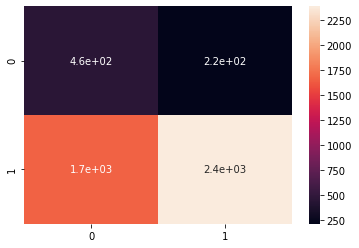

In [107]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred5, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred5), annot=True);

The AdaBoost is not as good as the best logistic regression model.

### 3.11 Ensemble: Stacking

In [59]:
from sklearn.ensemble import StackingClassifier

In [60]:
best_knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 5, metric = 'manhattan', weights = 'uniform')

In [61]:
estimators = [
    ('bestlog', best_log), 
    ('bestknn', best_knn)]
stack = StackingClassifier(estimators, final_estimator=LogisticRegression(), cv=5, 
                           stack_method='auto', n_jobs=-1, verbose=5)
stack.fit(X_smo_10, y_smo);

F beta Score for both classes:
0.77


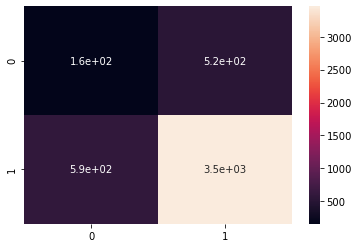

In [62]:
ye_pred6 = stack.predict(X_test_10)
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred6, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred6), annot=True);

Stacking is also not as good as the logistic regression model and barely better than the basline model.

### 3.12 Decision Tree (5 Features)

In [63]:
dt_clf = DecisionTreeClassifier(random_state=7)

param_grid7 = {'criterion': ['gini','entropy'],
             'max_depth': np.arange(1, 20),
             'min_samples_split':list(range(10,500,20)),
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid7 = RandomizedSearchCV(dt_clf, param_grid7, cv=5, verbose=5, n_jobs=-1)
grid7.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
                                                         {0: 0.95, 1: 0.05}],
                                        'criterion': ['gini', 'en

In [64]:
best_dt_model_5 = grid7.best_params_
best_dt_model_5

{'min_samples_split': 390,
 'max_depth': 19,
 'criterion': 'gini',
 'class_weight': {0: 0.6, 1: 0.4}}

F beta Score for both classes:
0.74


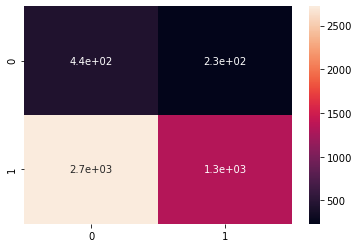

In [90]:
best_dt_model_5 = DecisionTreeClassifier(min_samples_split= 390, max_depth= 19, criterion ='gini', class_weight = {0: 0.6, 1: 0.4})
best_dt_model_5.fit(X_smo_5, y_smo)
ye_pred7 = best_dt_model_5.predict(X_test_5)
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred7, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred7), annot=True);

The decision tree is even worse than the baseline model.

### 3.13 Decision Tree (10 Features)

In [67]:
dt_clf = DecisionTreeClassifier(random_state=7)

param_grid8 = {'criterion': ['gini','entropy'],
             'max_depth': np.arange(1, 20),
             'min_samples_split':list(range(10,500,20)),
             'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid8 = RandomizedSearchCV(dt_clf, param_grid8, cv=5, verbose=5, n_jobs=-1)
grid8.fit(X_smo_10, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
                                                         {0: 0.95, 1: 0.05}],
                                        'criterion': ['gini', 'en

In [68]:
best_dt_model_10 = grid8.best_params_
best_dt_model_10

{'min_samples_split': 90,
 'max_depth': 12,
 'criterion': 'entropy',
 'class_weight': {0: 0.5, 1: 0.5}}

F beta Score for both classes:
0.81


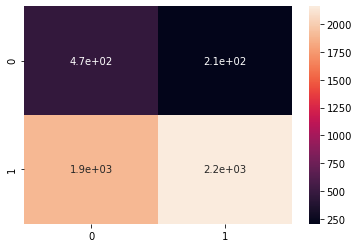

In [91]:
best_dt_model_10 = DecisionTreeClassifier(min_samples_split= 190, max_depth= 5, criterion ='entropy', class_weight = {0: 0.6, 1: 0.4})
best_dt_model_10.fit(X_smo_10, y_smo)
ye_pred8 = best_dt_model_10.predict(X_test_10)
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred8, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred8), annot=True);

This decision tree is nearly as good as the logistic model.

### 3.14 Random Forest (5 Features)

In [71]:
rf_clf =RandomForestClassifier(n_jobs = -1, random_state = 8, verbose = 5, bootstrap = True)
param_grid9 = {'n_estimators': np.arange(100, 1000),
               'max_depth': np.arange(1, 20),
               'criterion': ['gini','entropy'],
               'min_samples_split':list(range(10,500,20)),
               'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid9 = RandomizedSearchCV(rf_clf, param_grid9, cv=5, verbose=5, n_jobs=-1)
grid9.fit(X_smo_5, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 904building tree 2 of 904building tree 3 of 904

building tree 4 of 904

building tree 5 of 904building tree 6 of 904

building tree 7 of 904
building tree 8 of 904
building tree 9 of 904
building tree 10 of 904
building tree 11 of 904
building tree 12 of 904
building tree 13 of 904building tree 14 of 904

building tree 15 of 904
building tree 16 of 904
building tree 17 of 904building tree 18 of 904

building tree 19 of 904
building tree 20 of 904
building tree 21 of 904
building tree 22 of 904
building tree 23 of 904
building tree 24 of 904
building tree 25 of 904building tree 26 of 904

building tree 27 of 904
building tree 28 of 904
building tree 29 of 904
building tree 30 of 904
building tree 31 of 904
building tree 32 of 904
building tree 33 of 904
building tree 34 of 904
building tree 35 of 904
building tree 36 of 904
building tree 37 of 904
building tree 38 of 904building tree 39 of 904

building tree 40 of 904
building tree 41 of 904
building tree 42 of 904
b

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.2s


building tree 74 of 904building tree 75 of 904

building tree 76 of 904
building tree 77 of 904
building tree 78 of 904
building tree 79 of 904
building tree 80 of 904
building tree 81 of 904
building tree 82 of 904
building tree 83 of 904
building tree 84 of 904
building tree 85 of 904
building tree 86 of 904
building tree 87 of 904
building tree 88 of 904
building tree 89 of 904
building tree 90 of 904
building tree 91 of 904
building tree 92 of 904
building tree 93 of 904
building tree 94 of 904
building tree 95 of 904
building tree 96 of 904
building tree 97 of 904
building tree 98 of 904
building tree 99 of 904
building tree 100 of 904
building tree 101 of 904
building tree 102 of 904
building tree 103 of 904
building tree 104 of 904
building tree 105 of 904
building tree 106 of 904
building tree 107 of 904
building tree 108 of 904
building tree 109 of 904building tree 110 of 904

building tree 111 of 904
building tree 112 of 904
building tree 113 of 904
building tree 114 of 904
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    3.0s


building tree 168 of 904building tree 169 of 904

building tree 170 of 904
building tree 171 of 904
building tree 172 of 904
building tree 173 of 904
building tree 174 of 904
building tree 175 of 904
building tree 176 of 904
building tree 177 of 904
building tree 178 of 904
building tree 179 of 904
building tree 180 of 904
building tree 181 of 904
building tree 182 of 904
building tree 183 of 904
building tree 184 of 904
building tree 185 of 904
building tree 186 of 904
building tree 187 of 904
building tree 188 of 904
building tree 189 of 904
building tree 190 of 904building tree 191 of 904

building tree 192 of 904
building tree 193 of 904
building tree 194 of 904
building tree 195 of 904
building tree 196 of 904
building tree 197 of 904
building tree 198 of 904
building tree 199 of 904
building tree 200 of 904
building tree 201 of 904
building tree 202 of 904
building tree 203 of 904
building tree 204 of 904
building tree 205 of 904
building tree 206 of 904
building tree 207 of 904


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    5.6s


building tree 285 of 904
building tree 286 of 904
building tree 287 of 904
building tree 288 of 904
building tree 289 of 904
building tree 290 of 904
building tree 291 of 904
building tree 292 of 904
building tree 293 of 904
building tree 294 of 904
building tree 295 of 904
building tree 296 of 904
building tree 297 of 904
building tree 298 of 904
building tree 299 of 904
building tree 300 of 904
building tree 301 of 904
building tree 302 of 904
building tree 303 of 904
building tree 304 of 904
building tree 305 of 904
building tree 306 of 904
building tree 307 of 904
building tree 308 of 904
building tree 309 of 904
building tree 310 of 904
building tree 311 of 904
building tree 312 of 904
building tree 313 of 904
building tree 314 of 904
building tree 315 of 904
building tree 316 of 904
building tree 317 of 904
building tree 318 of 904
building tree 319 of 904
building tree 320 of 904
building tree 321 of 904
building tree 322 of 904
building tree 323 of 904
building tree 324 of 904


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    8.8s


building tree 447 of 904
building tree 448 of 904
building tree 449 of 904
building tree 450 of 904
building tree 451 of 904
building tree 452 of 904
building tree 453 of 904
building tree 454 of 904
building tree 455 of 904
building tree 456 of 904
building tree 457 of 904
building tree 458 of 904
building tree 459 of 904
building tree 460 of 904
building tree 461 of 904
building tree 462 of 904
building tree 463 of 904
building tree 464 of 904
building tree 465 of 904
building tree 466 of 904
building tree 467 of 904
building tree 468 of 904building tree 469 of 904

building tree 470 of 904
building tree 471 of 904
building tree 472 of 904
building tree 473 of 904
building tree 474 of 904
building tree 475 of 904
building tree 476 of 904
building tree 477 of 904
building tree 478 of 904
building tree 479 of 904
building tree 480 of 904
building tree 481 of 904
building tree 482 of 904
building tree 483 of 904
building tree 484 of 904
building tree 485 of 904
building tree 486 of 904


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   12.8s


building tree 654 of 904
building tree 655 of 904
building tree 656 of 904
building tree 657 of 904
building tree 658 of 904
building tree 659 of 904
building tree 660 of 904
building tree 661 of 904
building tree 662 of 904
building tree 663 of 904
building tree 664 of 904
building tree 665 of 904
building tree 666 of 904
building tree 667 of 904
building tree 668 of 904
building tree 669 of 904
building tree 670 of 904
building tree 671 of 904
building tree 672 of 904
building tree 673 of 904
building tree 674 of 904
building tree 675 of 904
building tree 676 of 904
building tree 677 of 904
building tree 678 of 904
building tree 679 of 904
building tree 680 of 904
building tree 681 of 904
building tree 682 of 904
building tree 683 of 904
building tree 684 of 904
building tree 685 of 904
building tree 686 of 904
building tree 687 of 904
building tree 688 of 904
building tree 689 of 904
building tree 690 of 904
building tree 691 of 904
building tree 692 of 904
building tree 693 of 904


[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   17.6s


building tree 883 of 904
building tree 884 of 904
building tree 885 of 904
building tree 886 of 904
building tree 887 of 904
building tree 888 of 904
building tree 889 of 904
building tree 890 of 904
building tree 891 of 904
building tree 892 of 904building tree 893 of 904

building tree 894 of 904
building tree 895 of 904
building tree 896 of 904
building tree 897 of 904
building tree 898 of 904
building tree 899 of 904
building tree 900 of 904
building tree 901 of 904
building tree 902 of 904
building tree 903 of 904
building tree 904 of 904


[Parallel(n_jobs=-1)]: Done 904 out of 904 | elapsed:   18.2s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=8,
                                                    verbose=5),
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
                                                  

In [72]:
best_rf_model_5 = grid9.best_params_
best_rf_model_5

{'n_estimators': 904,
 'min_samples_split': 10,
 'max_depth': 17,
 'criterion': 'gini',
 'class_weight': {0: 0.2, 1: 0.8}}

In [108]:
best_rf_model_5 = RandomForestClassifier(n_jobs = -1, random_state = 8, verbose = 5, bootstrap = True, n_estimators = 904,
                                         min_samples_split = 10, max_depth = 17, criterion = 'gini',
                                         class_weight =  {0: 0.2, 1: 0.8})
best_rf_model_5.fit(X_smo_5, y_smo);
ye_pred9 = best_rf_model_5.predict(X_test_5);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 904building tree 2 of 904building tree 3 of 904building tree 4 of 904



building tree 5 of 904
building tree 6 of 904
building tree 7 of 904
building tree 8 of 904
building tree 9 of 904
building tree 10 of 904
building tree 11 of 904
building tree 12 of 904
building tree 13 of 904building tree 14 of 904

building tree 15 of 904
building tree 16 of 904
building tree 17 of 904
building tree 18 of 904
building tree 19 of 904building tree 20 of 904

building tree 21 of 904
building tree 22 of 904
building tree 23 of 904
building tree 24 of 904


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s


building tree 25 of 904
building tree 26 of 904
building tree 27 of 904
building tree 28 of 904
building tree 29 of 904
building tree 30 of 904
building tree 31 of 904
building tree 32 of 904
building tree 33 of 904
building tree 34 of 904
building tree 35 of 904
building tree 36 of 904
building tree 37 of 904
building tree 38 of 904
building tree 39 of 904
building tree 40 of 904
building tree 41 of 904
building tree 42 of 904
building tree 43 of 904
building tree 44 of 904
building tree 45 of 904
building tree 46 of 904
building tree 47 of 904
building tree 48 of 904
building tree 49 of 904
building tree 50 of 904building tree 51 of 904

building tree 52 of 904
building tree 53 of 904
building tree 54 of 904
building tree 55 of 904
building tree 56 of 904
building tree 57 of 904
building tree 58 of 904
building tree 59 of 904
building tree 60 of 904
building tree 61 of 904
building tree 62 of 904
building tree 63 of 904building tree 64 of 904

building tree 65 of 904
building tree 66

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.3s


building tree 73 of 904
building tree 74 of 904
building tree 75 of 904
building tree 76 of 904
building tree 77 of 904
building tree 78 of 904
building tree 79 of 904
building tree 80 of 904
building tree 81 of 904
building tree 82 of 904
building tree 83 of 904building tree 84 of 904

building tree 85 of 904
building tree 86 of 904
building tree 87 of 904
building tree 88 of 904
building tree 89 of 904
building tree 90 of 904
building tree 91 of 904
building tree 92 of 904
building tree 93 of 904
building tree 94 of 904
building tree 95 of 904
building tree 96 of 904
building tree 97 of 904
building tree 98 of 904
building tree 99 of 904
building tree 100 of 904
building tree 101 of 904
building tree 102 of 904building tree 103 of 904

building tree 104 of 904
building tree 105 of 904
building tree 106 of 904
building tree 107 of 904
building tree 108 of 904
building tree 109 of 904
building tree 110 of 904
building tree 111 of 904
building tree 112 of 904
building tree 113 of 904
bu

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    3.2s


building tree 164 of 904
building tree 165 of 904
building tree 166 of 904
building tree 167 of 904
building tree 168 of 904
building tree 169 of 904
building tree 170 of 904
building tree 171 of 904
building tree 172 of 904
building tree 173 of 904
building tree 174 of 904
building tree 175 of 904
building tree 176 of 904building tree 177 of 904

building tree 178 of 904
building tree 179 of 904
building tree 180 of 904
building tree 181 of 904
building tree 182 of 904
building tree 183 of 904
building tree 184 of 904building tree 185 of 904

building tree 186 of 904
building tree 187 of 904
building tree 188 of 904
building tree 189 of 904building tree 190 of 904building tree 191 of 904


building tree 192 of 904
building tree 193 of 904
building tree 194 of 904
building tree 195 of 904
building tree 196 of 904
building tree 197 of 904
building tree 198 of 904
building tree 199 of 904
building tree 200 of 904
building tree 201 of 904
building tree 202 of 904
building tree 203 of 904


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    5.7s


building tree 284 of 904
building tree 285 of 904
building tree 286 of 904
building tree 287 of 904
building tree 288 of 904
building tree 289 of 904
building tree 290 of 904
building tree 291 of 904
building tree 292 of 904building tree 293 of 904

building tree 294 of 904
building tree 295 of 904
building tree 296 of 904
building tree 297 of 904
building tree 298 of 904
building tree 299 of 904
building tree 300 of 904
building tree 301 of 904
building tree 302 of 904
building tree 303 of 904
building tree 304 of 904
building tree 305 of 904
building tree 306 of 904
building tree 307 of 904
building tree 308 of 904
building tree 309 of 904
building tree 310 of 904
building tree 311 of 904
building tree 312 of 904
building tree 313 of 904
building tree 314 of 904
building tree 315 of 904
building tree 316 of 904building tree 317 of 904

building tree 318 of 904
building tree 319 of 904
building tree 320 of 904
building tree 321 of 904
building tree 322 of 904
building tree 323 of 904


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    8.5s


building tree 449 of 904
building tree 450 of 904
building tree 451 of 904
building tree 452 of 904
building tree 453 of 904
building tree 454 of 904
building tree 455 of 904
building tree 456 of 904building tree 457 of 904

building tree 458 of 904
building tree 459 of 904
building tree 460 of 904
building tree 461 of 904
building tree 462 of 904
building tree 463 of 904
building tree 464 of 904
building tree 465 of 904
building tree 466 of 904
building tree 467 of 904
building tree 468 of 904
building tree 469 of 904
building tree 470 of 904building tree 471 of 904

building tree 472 of 904
building tree 473 of 904
building tree 474 of 904
building tree 475 of 904
building tree 476 of 904
building tree 477 of 904
building tree 478 of 904
building tree 479 of 904
building tree 480 of 904
building tree 481 of 904
building tree 482 of 904
building tree 483 of 904
building tree 484 of 904
building tree 485 of 904
building tree 486 of 904
building tree 487 of 904
building tree 488 of 904


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   12.4s


building tree 646 of 904
building tree 647 of 904
building tree 648 of 904
building tree 649 of 904
building tree 650 of 904
building tree 651 of 904
building tree 652 of 904
building tree 653 of 904
building tree 654 of 904
building tree 655 of 904
building tree 656 of 904
building tree 657 of 904
building tree 658 of 904
building tree 659 of 904
building tree 660 of 904
building tree 661 of 904
building tree 662 of 904
building tree 663 of 904
building tree 664 of 904
building tree 665 of 904
building tree 666 of 904
building tree 667 of 904
building tree 668 of 904
building tree 669 of 904
building tree 670 of 904
building tree 671 of 904
building tree 672 of 904
building tree 673 of 904
building tree 674 of 904
building tree 675 of 904
building tree 676 of 904
building tree 677 of 904
building tree 678 of 904
building tree 679 of 904
building tree 680 of 904
building tree 681 of 904
building tree 682 of 904
building tree 683 of 904
building tree 684 of 904
building tree 685 of 904


[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   16.5s


building tree 878 of 904
building tree 879 of 904
building tree 880 of 904
building tree 881 of 904
building tree 882 of 904
building tree 883 of 904
building tree 884 of 904
building tree 885 of 904
building tree 886 of 904
building tree 887 of 904
building tree 888 of 904
building tree 889 of 904
building tree 890 of 904
building tree 891 of 904
building tree 892 of 904
building tree 893 of 904
building tree 894 of 904
building tree 895 of 904
building tree 896 of 904
building tree 897 of 904
building tree 898 of 904
building tree 899 of 904
building tree 900 of 904
building tree 901 of 904
building tree 902 of 904
building tree 903 of 904
building tree 904 of 904


[Parallel(n_jobs=-1)]: Done 904 out of 904 | elapsed:   17.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 904 out of 904 | elapsed:    0.3s finished


F beta Score for both classes:
0.76


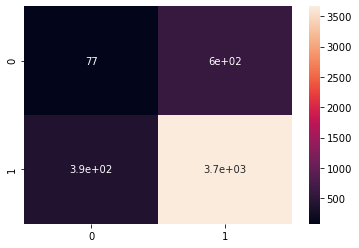

In [110]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred9, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred9), annot=True);

The randon forest is not better than the baseline model.

### 3.15 Random Forest (10 Features)

In [81]:
rf_clf =RandomForestClassifier(n_jobs = -1, random_state = 8, verbose = 5, bootstrap = True)
param_grid10 = {'n_estimators': np.arange(100, 1000),
               'max_depth': np.arange(1, 20),
               'criterion': ['gini','entropy'],
               'min_samples_split':list(range(10,500,20)),
               'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                              {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                              {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]}
grid10 = RandomizedSearchCV(rf_clf, param_grid10, cv=5, verbose=5, n_jobs=-1)
grid10.fit(X_smo_10, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 588building tree 2 of 588building tree 3 of 588

building tree 4 of 588

building tree 5 of 588
building tree 6 of 588
building tree 7 of 588
building tree 8 of 588
building tree 9 of 588
building tree 10 of 588building tree 11 of 588

building tree 12 of 588
building tree 13 of 588
building tree 14 of 588
building tree 15 of 588
building tree 16 of 588
building tree 17 of 588
building tree 18 of 588
building tree 19 of 588
building tree 20 of 588
building tree 21 of 588
building tree 22 of 588
building tree 23 of 588
building tree 24 of 588


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


building tree 25 of 588
building tree 26 of 588
building tree 27 of 588
building tree 28 of 588
building tree 29 of 588
building tree 30 of 588
building tree 31 of 588
building tree 32 of 588
building tree 33 of 588
building tree 34 of 588building tree 35 of 588

building tree 36 of 588
building tree 37 of 588
building tree 38 of 588
building tree 39 of 588
building tree 40 of 588
building tree 41 of 588
building tree 42 of 588
building tree 43 of 588
building tree 44 of 588
building tree 45 of 588
building tree 46 of 588
building tree 47 of 588
building tree 48 of 588
building tree 49 of 588
building tree 50 of 588
building tree 51 of 588
building tree 52 of 588
building tree 53 of 588
building tree 54 of 588
building tree 55 of 588
building tree 56 of 588
building tree 57 of 588
building tree 58 of 588
building tree 59 of 588
building tree 60 of 588
building tree 61 of 588
building tree 62 of 588
building tree 63 of 588
building tree 64 of 588
building tree 65 of 588building tree 66 

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s


building tree 69 of 588
building tree 70 of 588
building tree 71 of 588
building tree 72 of 588
building tree 73 of 588
building tree 74 of 588
building tree 75 of 588
building tree 76 of 588
building tree 77 of 588
building tree 78 of 588building tree 79 of 588

building tree 80 of 588
building tree 81 of 588
building tree 82 of 588
building tree 83 of 588
building tree 84 of 588
building tree 85 of 588
building tree 86 of 588
building tree 87 of 588
building tree 88 of 588
building tree 89 of 588
building tree 90 of 588
building tree 91 of 588
building tree 92 of 588
building tree 93 of 588
building tree 94 of 588
building tree 95 of 588
building tree 96 of 588
building tree 97 of 588
building tree 98 of 588
building tree 99 of 588
building tree 100 of 588
building tree 101 of 588
building tree 102 of 588
building tree 103 of 588
building tree 104 of 588
building tree 105 of 588
building tree 106 of 588
building tree 107 of 588
building tree 108 of 588
building tree 109 of 588
buildi

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    3.7s


building tree 161 of 588

building tree 162 of 588
building tree 163 of 588
building tree 164 of 588
building tree 165 of 588
building tree 166 of 588
building tree 167 of 588
building tree 168 of 588
building tree 169 of 588
building tree 170 of 588
building tree 171 of 588
building tree 172 of 588
building tree 173 of 588
building tree 174 of 588
building tree 175 of 588
building tree 176 of 588
building tree 177 of 588
building tree 178 of 588
building tree 179 of 588
building tree 180 of 588
building tree 181 of 588
building tree 182 of 588
building tree 183 of 588
building tree 184 of 588
building tree 185 of 588
building tree 186 of 588
building tree 187 of 588
building tree 188 of 588
building tree 189 of 588
building tree 190 of 588
building tree 191 of 588
building tree 192 of 588
building tree 193 of 588
building tree 194 of 588
building tree 195 of 588
building tree 196 of 588
building tree 197 of 588
building tree 198 of 588
building tree 199 of 588
building tree 200 of 588

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    6.6s


building tree 287 of 588
building tree 288 of 588
building tree 289 of 588
building tree 290 of 588
building tree 291 of 588
building tree 292 of 588
building tree 293 of 588
building tree 294 of 588
building tree 295 of 588
building tree 296 of 588
building tree 297 of 588
building tree 298 of 588
building tree 299 of 588
building tree 300 of 588
building tree 301 of 588
building tree 302 of 588
building tree 303 of 588
building tree 304 of 588
building tree 305 of 588
building tree 306 of 588
building tree 307 of 588
building tree 308 of 588building tree 309 of 588
building tree 310 of 588

building tree 311 of 588
building tree 312 of 588
building tree 313 of 588
building tree 314 of 588
building tree 315 of 588
building tree 316 of 588
building tree 317 of 588
building tree 318 of 588
building tree 319 of 588
building tree 320 of 588
building tree 321 of 588
building tree 322 of 588
building tree 323 of 588
building tree 324 of 588
building tree 325 of 588
building tree 326 of 588


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   10.3s


building tree 450 of 588
building tree 451 of 588
building tree 452 of 588
building tree 453 of 588
building tree 454 of 588building tree 455 of 588

building tree 456 of 588building tree 457 of 588

building tree 458 of 588
building tree 459 of 588
building tree 460 of 588
building tree 461 of 588
building tree 462 of 588
building tree 463 of 588
building tree 464 of 588
building tree 465 of 588
building tree 466 of 588
building tree 467 of 588
building tree 468 of 588
building tree 469 of 588
building tree 470 of 588
building tree 471 of 588
building tree 472 of 588
building tree 473 of 588
building tree 474 of 588
building tree 475 of 588
building tree 476 of 588
building tree 477 of 588
building tree 478 of 588
building tree 479 of 588
building tree 480 of 588
building tree 481 of 588
building tree 482 of 588
building tree 483 of 588
building tree 484 of 588
building tree 485 of 588
building tree 486 of 588
building tree 487 of 588
building tree 488 of 588
building tree 489 of 588


[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:   13.1s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=8,
                                                    verbose=5),
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.1, 1: 0.9},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.9, 1: 0.1},
                                                  

In [82]:
best_rf_model_10 = grid10.best_params_
best_rf_model_10

{'n_estimators': 588,
 'min_samples_split': 250,
 'max_depth': 16,
 'criterion': 'gini',
 'class_weight': {0: 0.5, 1: 0.5}}

In [111]:
best_rf_model_10 = RandomForestClassifier(n_jobs = -1, random_state = 8, verbose = 5, bootstrap = True, n_estimators= 588,
                                          min_samples_split= 250, max_depth = 10, criterion = 'gini', class_weight= {0: 0.6, 1: 0.4})
best_rf_model_10.fit(X_smo_10, y_smo)
ye_pred10 = best_rf_model_10.predict(X_test_10)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 588building tree 2 of 588building tree 3 of 588building tree 4 of 588



building tree 5 of 588
building tree 6 of 588
building tree 7 of 588
building tree 8 of 588
building tree 9 of 588
building tree 10 of 588
building tree 11 of 588
building tree 12 of 588
building tree 13 of 588
building tree 14 of 588
building tree 15 of 588
building tree 16 of 588
building tree 17 of 588
building tree 18 of 588
building tree 19 of 588
building tree 20 of 588
building tree 21 of 588
building tree 22 of 588
building tree 23 of 588
building tree 24 of 588
building tree 25 of 588
building tree 26 of 588
building tree 27 of 588
building tree 28 of 588

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s



building tree 29 of 588building tree 30 of 588

building tree 31 of 588
building tree 32 of 588
building tree 33 of 588
building tree 34 of 588
building tree 35 of 588
building tree 36 of 588
building tree 37 of 588
building tree 38 of 588
building tree 39 of 588
building tree 40 of 588
building tree 41 of 588building tree 42 of 588

building tree 43 of 588
building tree 44 of 588
building tree 45 of 588
building tree 46 of 588
building tree 47 of 588
building tree 48 of 588
building tree 49 of 588
building tree 50 of 588
building tree 51 of 588
building tree 52 of 588
building tree 53 of 588
building tree 54 of 588
building tree 55 of 588
building tree 56 of 588
building tree 57 of 588
building tree 58 of 588
building tree 59 of 588
building tree 60 of 588
building tree 61 of 588
building tree 62 of 588
building tree 63 of 588
building tree 64 of 588
building tree 65 of 588
building tree 66 of 588
building tree 67 of 588
building tree 68 of 588
building tree 69 of 588
building tree 7

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.2s


building tree 78 of 588
building tree 79 of 588
building tree 80 of 588
building tree 81 of 588
building tree 82 of 588
building tree 83 of 588
building tree 84 of 588
building tree 85 of 588
building tree 86 of 588
building tree 87 of 588
building tree 88 of 588
building tree 89 of 588
building tree 90 of 588
building tree 91 of 588
building tree 92 of 588
building tree 93 of 588
building tree 94 of 588
building tree 95 of 588
building tree 96 of 588
building tree 97 of 588
building tree 98 of 588
building tree 99 of 588
building tree 100 of 588
building tree 101 of 588
building tree 102 of 588
building tree 103 of 588
building tree 104 of 588
building tree 105 of 588
building tree 106 of 588
building tree 107 of 588
building tree 108 of 588
building tree 109 of 588
building tree 110 of 588
building tree 111 of 588
building tree 112 of 588
building tree 113 of 588
building tree 114 of 588
building tree 115 of 588building tree 116 of 588

building tree 117 of 588
building tree 118 of 5

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.8s


building tree 166 of 588building tree 167 of 588

building tree 168 of 588
building tree 169 of 588
building tree 170 of 588
building tree 171 of 588
building tree 172 of 588
building tree 173 of 588
building tree 174 of 588
building tree 175 of 588
building tree 176 of 588
building tree 177 of 588
building tree 178 of 588
building tree 179 of 588
building tree 180 of 588
building tree 181 of 588
building tree 182 of 588
building tree 183 of 588
building tree 184 of 588
building tree 185 of 588
building tree 186 of 588
building tree 187 of 588
building tree 188 of 588
building tree 189 of 588
building tree 190 of 588
building tree 191 of 588
building tree 192 of 588
building tree 193 of 588
building tree 194 of 588building tree 195 of 588

building tree 196 of 588
building tree 197 of 588
building tree 198 of 588
building tree 199 of 588
building tree 200 of 588
building tree 201 of 588
building tree 202 of 588
building tree 203 of 588
building tree 204 of 588
building tree 205 of 588


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.7s


building tree 284 of 588
building tree 285 of 588
building tree 286 of 588
building tree 287 of 588
building tree 288 of 588
building tree 289 of 588
building tree 290 of 588
building tree 291 of 588
building tree 292 of 588
building tree 293 of 588
building tree 294 of 588
building tree 295 of 588
building tree 296 of 588
building tree 297 of 588
building tree 298 of 588
building tree 299 of 588
building tree 300 of 588
building tree 301 of 588
building tree 302 of 588
building tree 303 of 588
building tree 304 of 588
building tree 305 of 588
building tree 306 of 588
building tree 307 of 588
building tree 308 of 588
building tree 309 of 588
building tree 310 of 588
building tree 311 of 588
building tree 312 of 588
building tree 313 of 588
building tree 314 of 588
building tree 315 of 588
building tree 316 of 588
building tree 317 of 588
building tree 318 of 588
building tree 319 of 588
building tree 320 of 588
building tree 321 of 588
building tree 322 of 588
building tree 323 of 588


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    7.1s


building tree 452 of 588
building tree 453 of 588
building tree 454 of 588
building tree 455 of 588
building tree 456 of 588
building tree 457 of 588
building tree 458 of 588
building tree 459 of 588
building tree 460 of 588building tree 461 of 588

building tree 462 of 588
building tree 463 of 588
building tree 464 of 588
building tree 465 of 588
building tree 466 of 588
building tree 467 of 588
building tree 468 of 588
building tree 469 of 588
building tree 470 of 588
building tree 471 of 588
building tree 472 of 588
building tree 473 of 588
building tree 474 of 588
building tree 475 of 588
building tree 476 of 588
building tree 477 of 588
building tree 478 of 588
building tree 479 of 588
building tree 480 of 588
building tree 481 of 588
building tree 482 of 588
building tree 483 of 588
building tree 484 of 588
building tree 485 of 588
building tree 486 of 588
building tree 487 of 588
building tree 488 of 588
building tree 489 of 588
building tree 490 of 588
building tree 491 of 588


[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 588 out of 588 | elapsed:    0.2s finished


F beta Score for both classes:
0.81


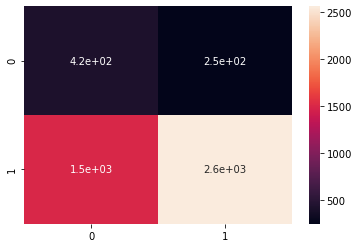

In [112]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred10, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred10), annot=True);

### 3.16 Ensemble: AdaBoost Part II (Decision Tree)

In [96]:
clf_boost = AdaBoostClassifier(base_estimator=best_dt_model_10) 

param_grid11 = {'n_estimators':np.arange(1, 150),                
              'learning_rate':np.arange(0.1, 1),                          
             } 
grid11 = RandomizedSearchCV(clf_boost, param_grid11, verbose = 5) 
grid11.fit(X_smo_10, y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=130, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=130, learning_rate=0.1, score=0.584, total=  15.6s
[CV] n_estimators=130, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV] . n_estimators=130, learning_rate=0.1, score=0.969, total=  14.2s
[CV] n_estimators=130, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.9s remaining:    0.0s


[CV] . n_estimators=130, learning_rate=0.1, score=0.964, total=  14.3s
[CV] n_estimators=130, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.1s remaining:    0.0s


[CV] . n_estimators=130, learning_rate=0.1, score=0.973, total=  14.2s
[CV] n_estimators=130, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   58.4s remaining:    0.0s


[CV] . n_estimators=130, learning_rate=0.1, score=0.969, total=  14.2s
[CV] n_estimators=102, learning_rate=0.1 .............................
[CV] . n_estimators=102, learning_rate=0.1, score=0.583, total=  12.2s
[CV] n_estimators=102, learning_rate=0.1 .............................
[CV] . n_estimators=102, learning_rate=0.1, score=0.966, total=  11.2s
[CV] n_estimators=102, learning_rate=0.1 .............................
[CV] . n_estimators=102, learning_rate=0.1, score=0.963, total=  11.2s
[CV] n_estimators=102, learning_rate=0.1 .............................
[CV] . n_estimators=102, learning_rate=0.1, score=0.973, total=  11.2s
[CV] n_estimators=102, learning_rate=0.1 .............................
[CV] . n_estimators=102, learning_rate=0.1, score=0.965, total=  11.2s
[CV] n_estimators=81, learning_rate=0.1 ..............................
[CV] .. n_estimators=81, learning_rate=0.1, score=0.583, total=   9.7s
[CV] n_estimators=81, learning_rate=0.1 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.8min finished


RandomizedSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6,
                                                                                                    1: 0.4},
                                                                                      criterion='entropy',
                                                                                      max_depth=5,
                                                                                      min_samples_split=190)),
                   param_distributions={'learning_rate': array([0.1]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        4...
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  

In [97]:
best_boost_model = grid11.best_params_
best_boost_model

{'n_estimators': 135, 'learning_rate': 0.1}

In [113]:
best_boost = AdaBoostClassifier(base_estimator=best_dt_model_10, n_estimators = 135, learning_rate = 0.1) 
best_boost.fit(X_smo_10, y_smo)
ye_pred11 = best_boost.predict(X_test_10)

F beta Score for both classes:
0.79


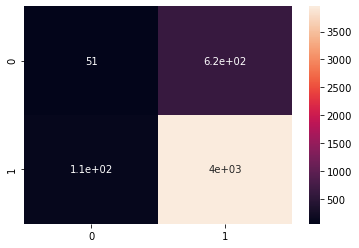

In [114]:
print('F beta Score for both classes:')
print(fbeta_score(ye_test, ye_pred11, beta = .1, average = 'weighted').round(2))
sns.heatmap(confusion_matrix(ye_test, ye_pred11), annot=True);

The second adaboost is better than the baseline but not as good as random forest and logistic regression with 10 features. 